In [ ]:
library(tidyverse)
library(data.table)
library(RColorBrewer)
library(MetBrewer)

## Read in filtered 6-base data

In [4]:
modC_0day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day0_repavg_6base.bed")
modC_4day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day4_repavg_6base.bed")
modC_8day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/day8_repavg_6base.bed")

#find average modC values across each peak region 

cluster,peakID,region_chr,region_start,region_end,atacme_avg,sixbase_avg,behavior,distance
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,peak10017,chr10,6649162,6649466,0.2000000,0.1691919,closing,0.021784603
1,peak100200,chr9,126535294,126535759,0.1288888,0.1611905,closing,0.022840734
1,peak100218,chr9,126661496,126662153,0.3123740,0.1671714,closing,0.102673737
1,peak100291,chr9,127561903,127562190,0.5632783,0.3408724,closing,0.157264695
1,peak10031,chr10,7301484,7301770,0.3509350,0.3420883,closing,0.006255593
1,peak100357,chr9,128091224,128091515,0.5061938,0.2690867,closing,0.167660005


[1] 0.8579567

[1] 0.8727183

[1] 0.82396

[1] 0.8241645

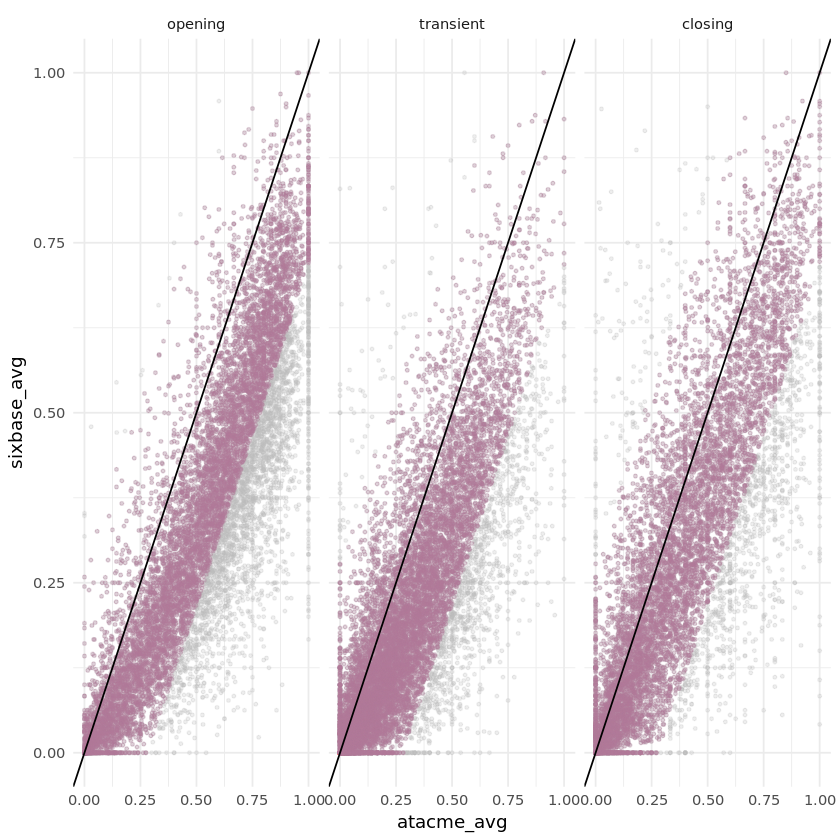

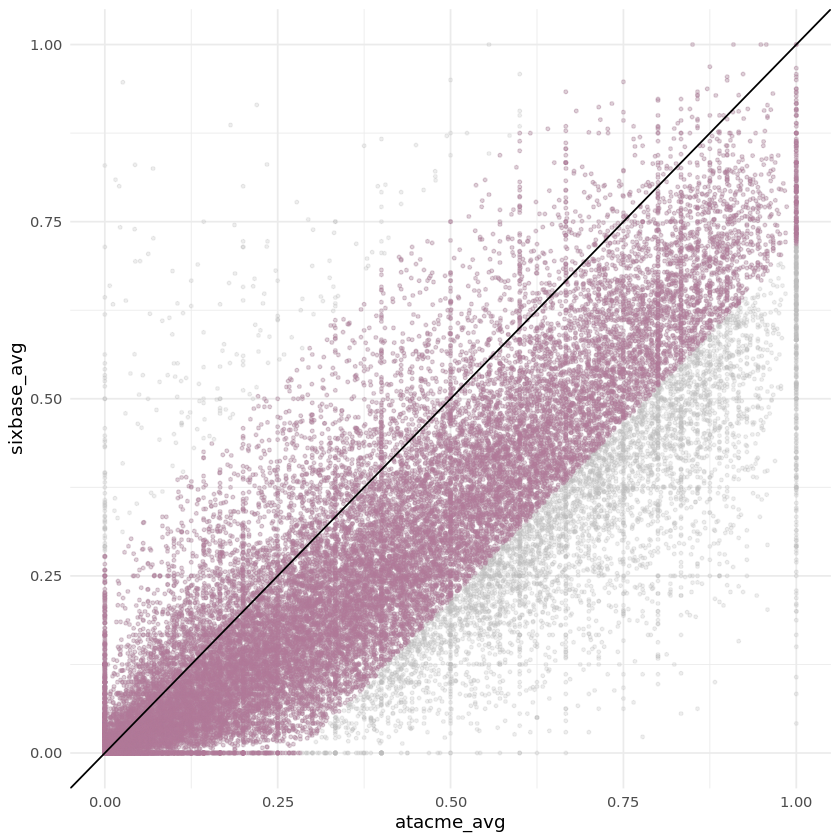

In [4]:
modC_0day_region<- modC_0day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "0day")
modC_4day_region<- modC_4day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "4day")
modC_8day_region<- modC_8day %>% group_by(peakID,cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "8day")

modC_cluster<- rbind(modC_0day_region, modC_4day_region, modC_8day_region)
hmC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_hmC)
mC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_mC)

allmod_cluster<- pivot_longer(modC_cluster, names_to = "mod", values_to = "avg_signal", cols = c(reg_avg_mC, reg_avg_hmC, reg_avg_unmodC))

write_tsv(modC_cluster, "/data/hodges_lab/6L_seq/data/modC_6L_data.tsv")


In [ ]:
hmc_w<- combined %>% select(-acc) %>% pivot_wider(values_from = hmC, names_from = time) %>% ungroup() %>% drop_na() %>% mutate(dh_0_96 = `96`- `0`, dh_96_192 = `192`-`96`, dh_0_192 = `192`- `0`) 
hmc_l<- hmc_w %>% pivot_longer(cols = 8:10, names_to = "time") %>% group_by(cluster, time) %>% summarise(avg = mean(value))
acc_w<- combined %>% select(-hmC) %>% pivot_wider(values_from = acc, names_from = time) %>% ungroup() %>% drop_na() %>% mutate(da_0_96 = log2(`96`)- log2(`0`), da_96_192 = log2(`192`)-log2(`96`), da_0_192 = log2(`192`)- log2(`0`)) 
both_w<- inner_join(acc_w, hmc_w, by = c("peakID", "cluster", "annotation")) %>% select(peakID, cluster, da_0_192, `0`=`0.y`,`96`=`96.y`,`192`=`192.y`)%>% pivot_longer(cols = 4:6, names_to = "time")

delta_bar<- ggplot(hmc_l, aes(x = time, y = avg, fill = cluster,alpha = 0.8))+
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Paired") +
  facet_wrap(~cluster)+
  theme_minimal()
delta_bar

ggsave(delta_bar, filename= "/Users/lindsey/Desktop/Hodges_Lab/ATAC-me\ NPCdiff/NPCDiff_ATACme/New_timepoints/Figures/hmC_delta_byCluster.pdf", units = "in", width = 6, height = 5)
